In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import random
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras import regularizers


In [2]:
np.random.seed(42)

In [9]:
os.listdir("C:/Users/tirek/OneDrive/Masaüstü/emotion_from_image")

['.git', 'data', 'emotion_model.ipynb', 'Resimler', 'todo']

In [10]:
DATADIR = r"C:/Users/tirek/OneDrive/Masaüstü/emotion_from_image/data"

In [11]:
CATEGORIES = os.listdir(DATADIR)
CATEGORIES

['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']

In [24]:
import os
import cv2
from tqdm import tqdm
import numpy as np

CATEGORIES = ['anger', 'contempt', 'disgust','fear','happy', 'sadness', 'suprise']  # Example categories, replace with your actual ones


def load_data(img_size=64):
    DATADIR = r'C:/Users/tirek/OneDrive/Masaüstü/emotion_from_image/data'
    data = []
    
    # Iterate through categories
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)

        # Iterate through the images in each category
        for img_name in tqdm(os.listdir(path)):
            img_path = os.path.join(path, img_name)
            
            # Load image in grayscale
            img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            
            # Check if the image is loaded correctly
            if img_array is None:
                print(f"Warning: Unable to load image {img_name}. Skipping...")
                continue

            # Resize to fixed size
            img_array = cv2.resize(img_array, (img_size, img_size))  # Resize to fixed size

            # Normalize the image to [0, 1]
            img_array = img_array / 255.0
            
            # Append the image and its label
            data.append([img_array, class_num])

    # Shuffle the data (optional, but can help with training)
    np.random.shuffle(data)

    # Separate the features (images) and labels
    X = []
    y = []
    for img_array, class_num in data:
        X.append(img_array)
        y.append(class_num)

    # Convert to numpy arrays
    X = np.array(X).reshape(-1, img_size, img_size, 1)  # Reshaping to (samples, height, width, channels)
    y = np.array(y)

    return X, y

In [25]:
data=load_data()

100%|██████████| 135/135 [00:00<00:00, 19094.59it/s]


100%|██████████| 54/54 [00:00<00:00, 10773.55it/s]


100%|██████████| 177/177 [00:00<00:00, 17208.10it/s]


100%|██████████| 75/75 [00:00<00:00, 6520.59it/s]


100%|██████████| 207/207 [00:00<00:00, 11660.08it/s]


100%|██████████| 84/84 [00:00<00:00, 8190.10it/s]

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/tirek/OneDrive/Masaüstü/emotion_from_image/data\\suprise'

In [14]:
len(data)

981

In [17]:
print(data)

[[None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0], [None, 0]

<class 'NoneType'>


AttributeError: 'NoneType' object has no attribute 'dtype'

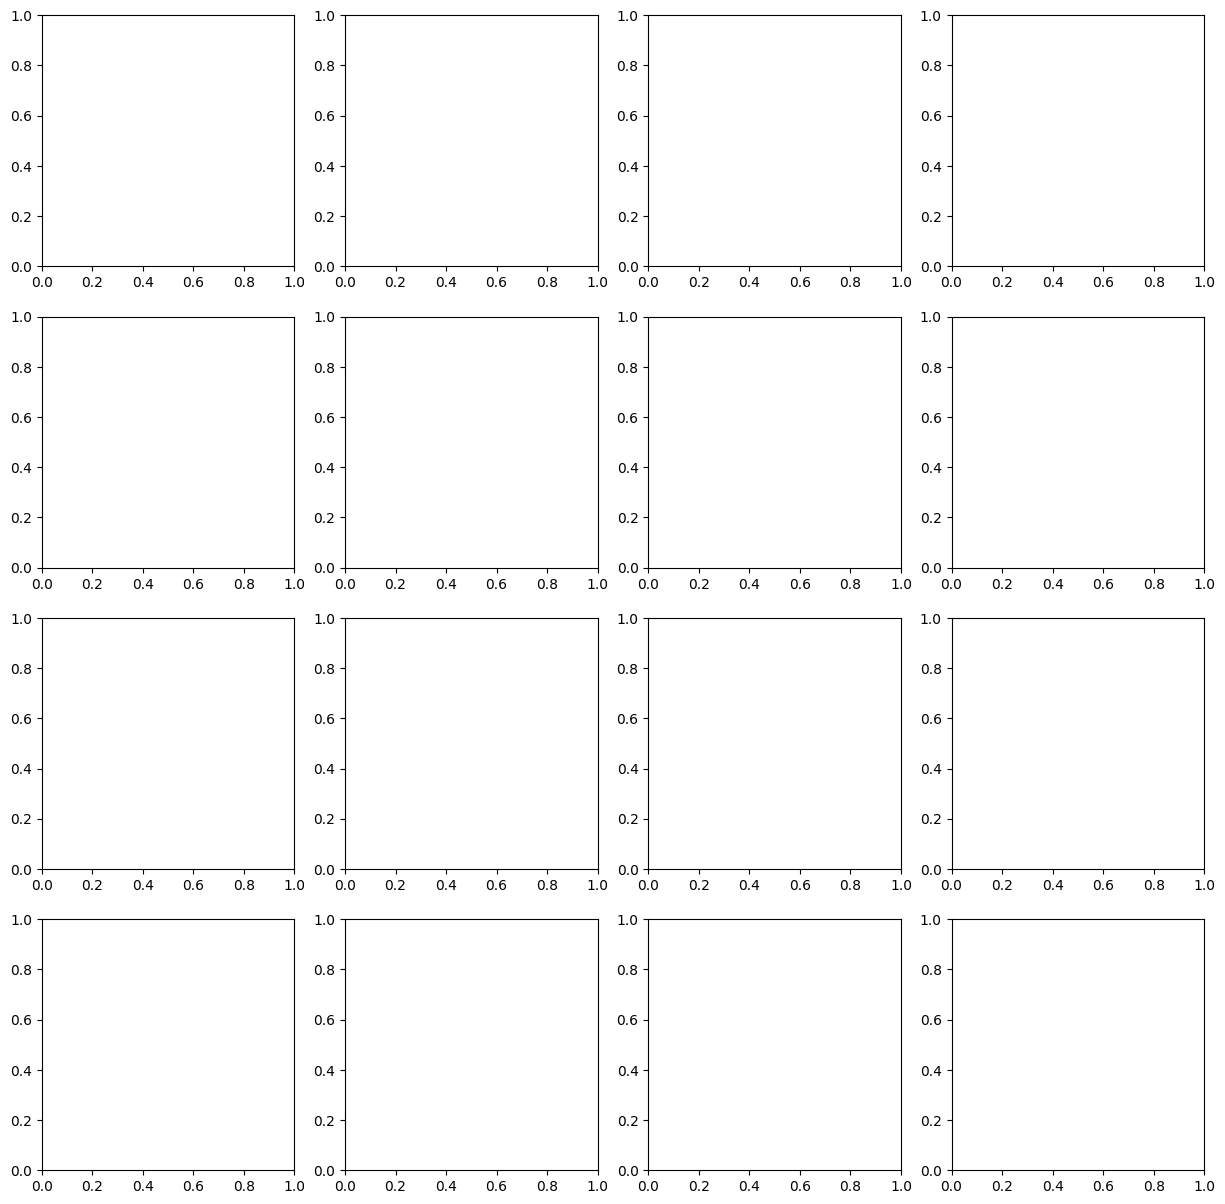

In [16]:
L = 4
W = 4
fig, axes = plt.subplots(L, W, figsize = (15,15))
axes = axes.ravel()

for i in range(0, L * W):  
    sample = random.choice(data)
    print(type(sample[0]))
    print(sample[0].dtype)

    axes[i].set_title("Expression = "+str(CATEGORIES[sample[1]]))
    axes[i].imshow(sample[0], cmap='gray')
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)